<a href="https://colab.research.google.com/github/RafaelLVaz/Modelo-Classificacao-Linear-load_breast_cancer/blob/main/Diagn%C3%B3stico_de_C%C3%A2ncer_de_Mama_com_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando as Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.datasets import load_breast_cancer

# 2. Carregando os dados

In [ ]:
data = load_breast_cancer() # Carregando dataframe de câncer de mama
df = pd.DataFrame(data.data, columns=data.feature_names) # Cria uma tabela com os dados do câncer.
df['target'] = data.target #adiciona coluna que indica o diagnóstico do tumor (0 = maligno, 1 = benigno)
df #exibe o dataframe + a coluna target criada

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# 3. Exploração dos Dados

In [ ]:
print("\nClass distribution:\n", df['target'].value_counts())  # mostra quantas amostras tem de cada classe


Class distribution:
 target
1    357
0    212
Name: count, dtype: int64


# 4. Separando dados de entrada (X) e dados de saída (y)

In [ ]:
X = df.drop(columns=['target'])  #removendo a coluna 'target' do DataFrame
y = df['target']  #Pegando apenas a coluna 'target', que queremos prever

# 5. Divisão do Dataset em 70% Treino e 30% Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# 6. Padronização dos Dados na mesma escala

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Treinando o modelo de classificação

In [ ]:
model = LogisticRegression( random_state=100)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=100)

# 8 - Fazendo predições para os dados de teste com o modelo treinado

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

In [ ]:
y_pred # classe prevista (0 = maligno, 1 = benigno)

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
y_pred_proba #probabilidade de cada amostra ser da classe 1

array([9.81937804e-01, 9.99948757e-01, 1.52398493e-02, 9.84974686e-01,
       9.99786178e-01, 9.98526679e-01, 1.78310855e-02, 2.19904186e-06,
       7.31592276e-01, 9.92308512e-01, 9.71680966e-01, 2.35124878e-01,
       9.97701593e-01, 9.37151101e-01, 1.87196826e-09, 9.99872385e-01,
       9.99945467e-01, 9.86648384e-01, 9.99908244e-01, 9.99875306e-01,
       9.98964154e-01, 1.22062686e-03, 9.85861189e-01, 9.97515801e-01,
       9.99998262e-01, 3.10876555e-01, 9.96460677e-01, 2.58284812e-03,
       4.34181512e-01, 9.10756157e-01, 1.01005080e-07, 4.44609408e-07,
       9.98503672e-01, 9.99310580e-01, 2.39433925e-06, 1.57696412e-04,
       2.17659922e-11, 1.11153070e-04, 1.51233823e-02, 1.32461047e-02,
       9.00124449e-01, 9.98150932e-01, 9.99820708e-01, 9.79576541e-01,
       3.94894680e-01, 1.13583468e-06, 5.27415108e-06, 1.92480354e-10,
       2.47091677e-02, 9.99279017e-01, 9.77130486e-01, 6.24896416e-07,
       9.75416729e-08, 3.87373958e-02, 9.99989621e-01, 9.96695664e-01,
      

# 9 - Avaliando a performance do modelo treinado utilizando os dados de teste

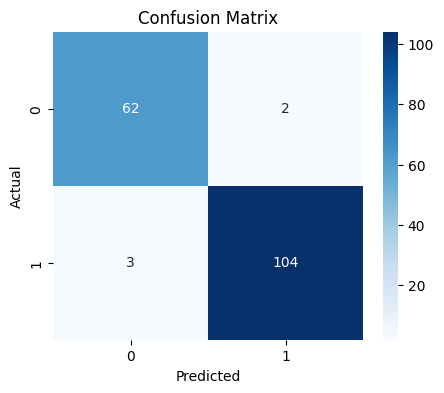

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-16-2d0aab48ffb1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["TN", "FP", "FN", "TP"], y=cm.ravel(), palette=["blue", "red", "orange", "green"])


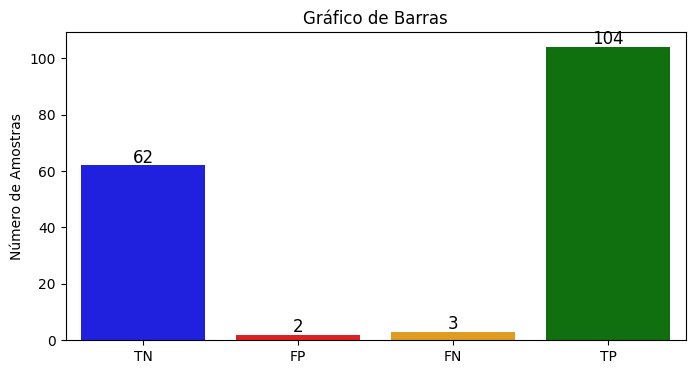

In [ ]:
# Matriz de Confusão Alternativo

cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x=["TN", "FP", "FN", "TP"], y=cm.ravel(), palette=["blue", "red", "orange", "green"])

# Adicionar rótulos
plt.ylabel("Número de Amostras")
plt.title("Gráfico de Barras")

# Exibir valores exatos no topo das barras
for i, val in enumerate(cm.ravel()):
    plt.text(i, val + 1, str(val), ha='center', fontsize=12)

plt.show()
